In [1]:
K_MAX = 128
R_MAX = 1024
Z_MAX = 1024
import itertools as it

%run GenerateParameters.ipynb

Generating cache table of size 1024x1024x128 (~27.0 bits)...


  0%|          | 0/1023 [00:00<?, ?it/s]

Done. Table generation took 5.3 seconds


In [2]:
%run LowerBoundBAAOptimizer.ipynb

In [6]:
t0 = time.time()
l = 0.19
L_val = 7.72 / l
beta = 0.438 * l * L_val
dist = generate_optimized_distribution(l=l, L_target=L_val, beta=beta, step_limit=10000, delta=1E-4, verbose=False)
d2 = np.concatenate(([0], dist[:-1]), axis=0)
rd = RunDistribution(d2, l)
print(l, L_val * l, beta / (l * L_val), rd.compute_lower_bound() / l, time.time() - t0)

/tmp/ipykernel_3106/3725662477.py:20: RuntimeWarning: divide by zero encountered in log
  return np.sum(P_ji * np.log(Q * P_ji / denominator), axis=0) - beta * D_i
/tmp/ipykernel_3106/1051017242.py:4: RuntimeWarning: divide by zero encountered in log
  log_alphas = np.log(alphas) + power
/tmp/ipykernel_3106/1519686401.py:28: RuntimeWarning: divide by zero encountered in true_divide
  d = np.max(np.log(Q / next_Q))
/tmp/ipykernel_3106/1519686401.py:28: RuntimeWarning: invalid value encountered in true_divide
  d = np.max(np.log(Q / next_Q))


0.19 7.72 0.438 0.1221362491219246 43.45321011543274


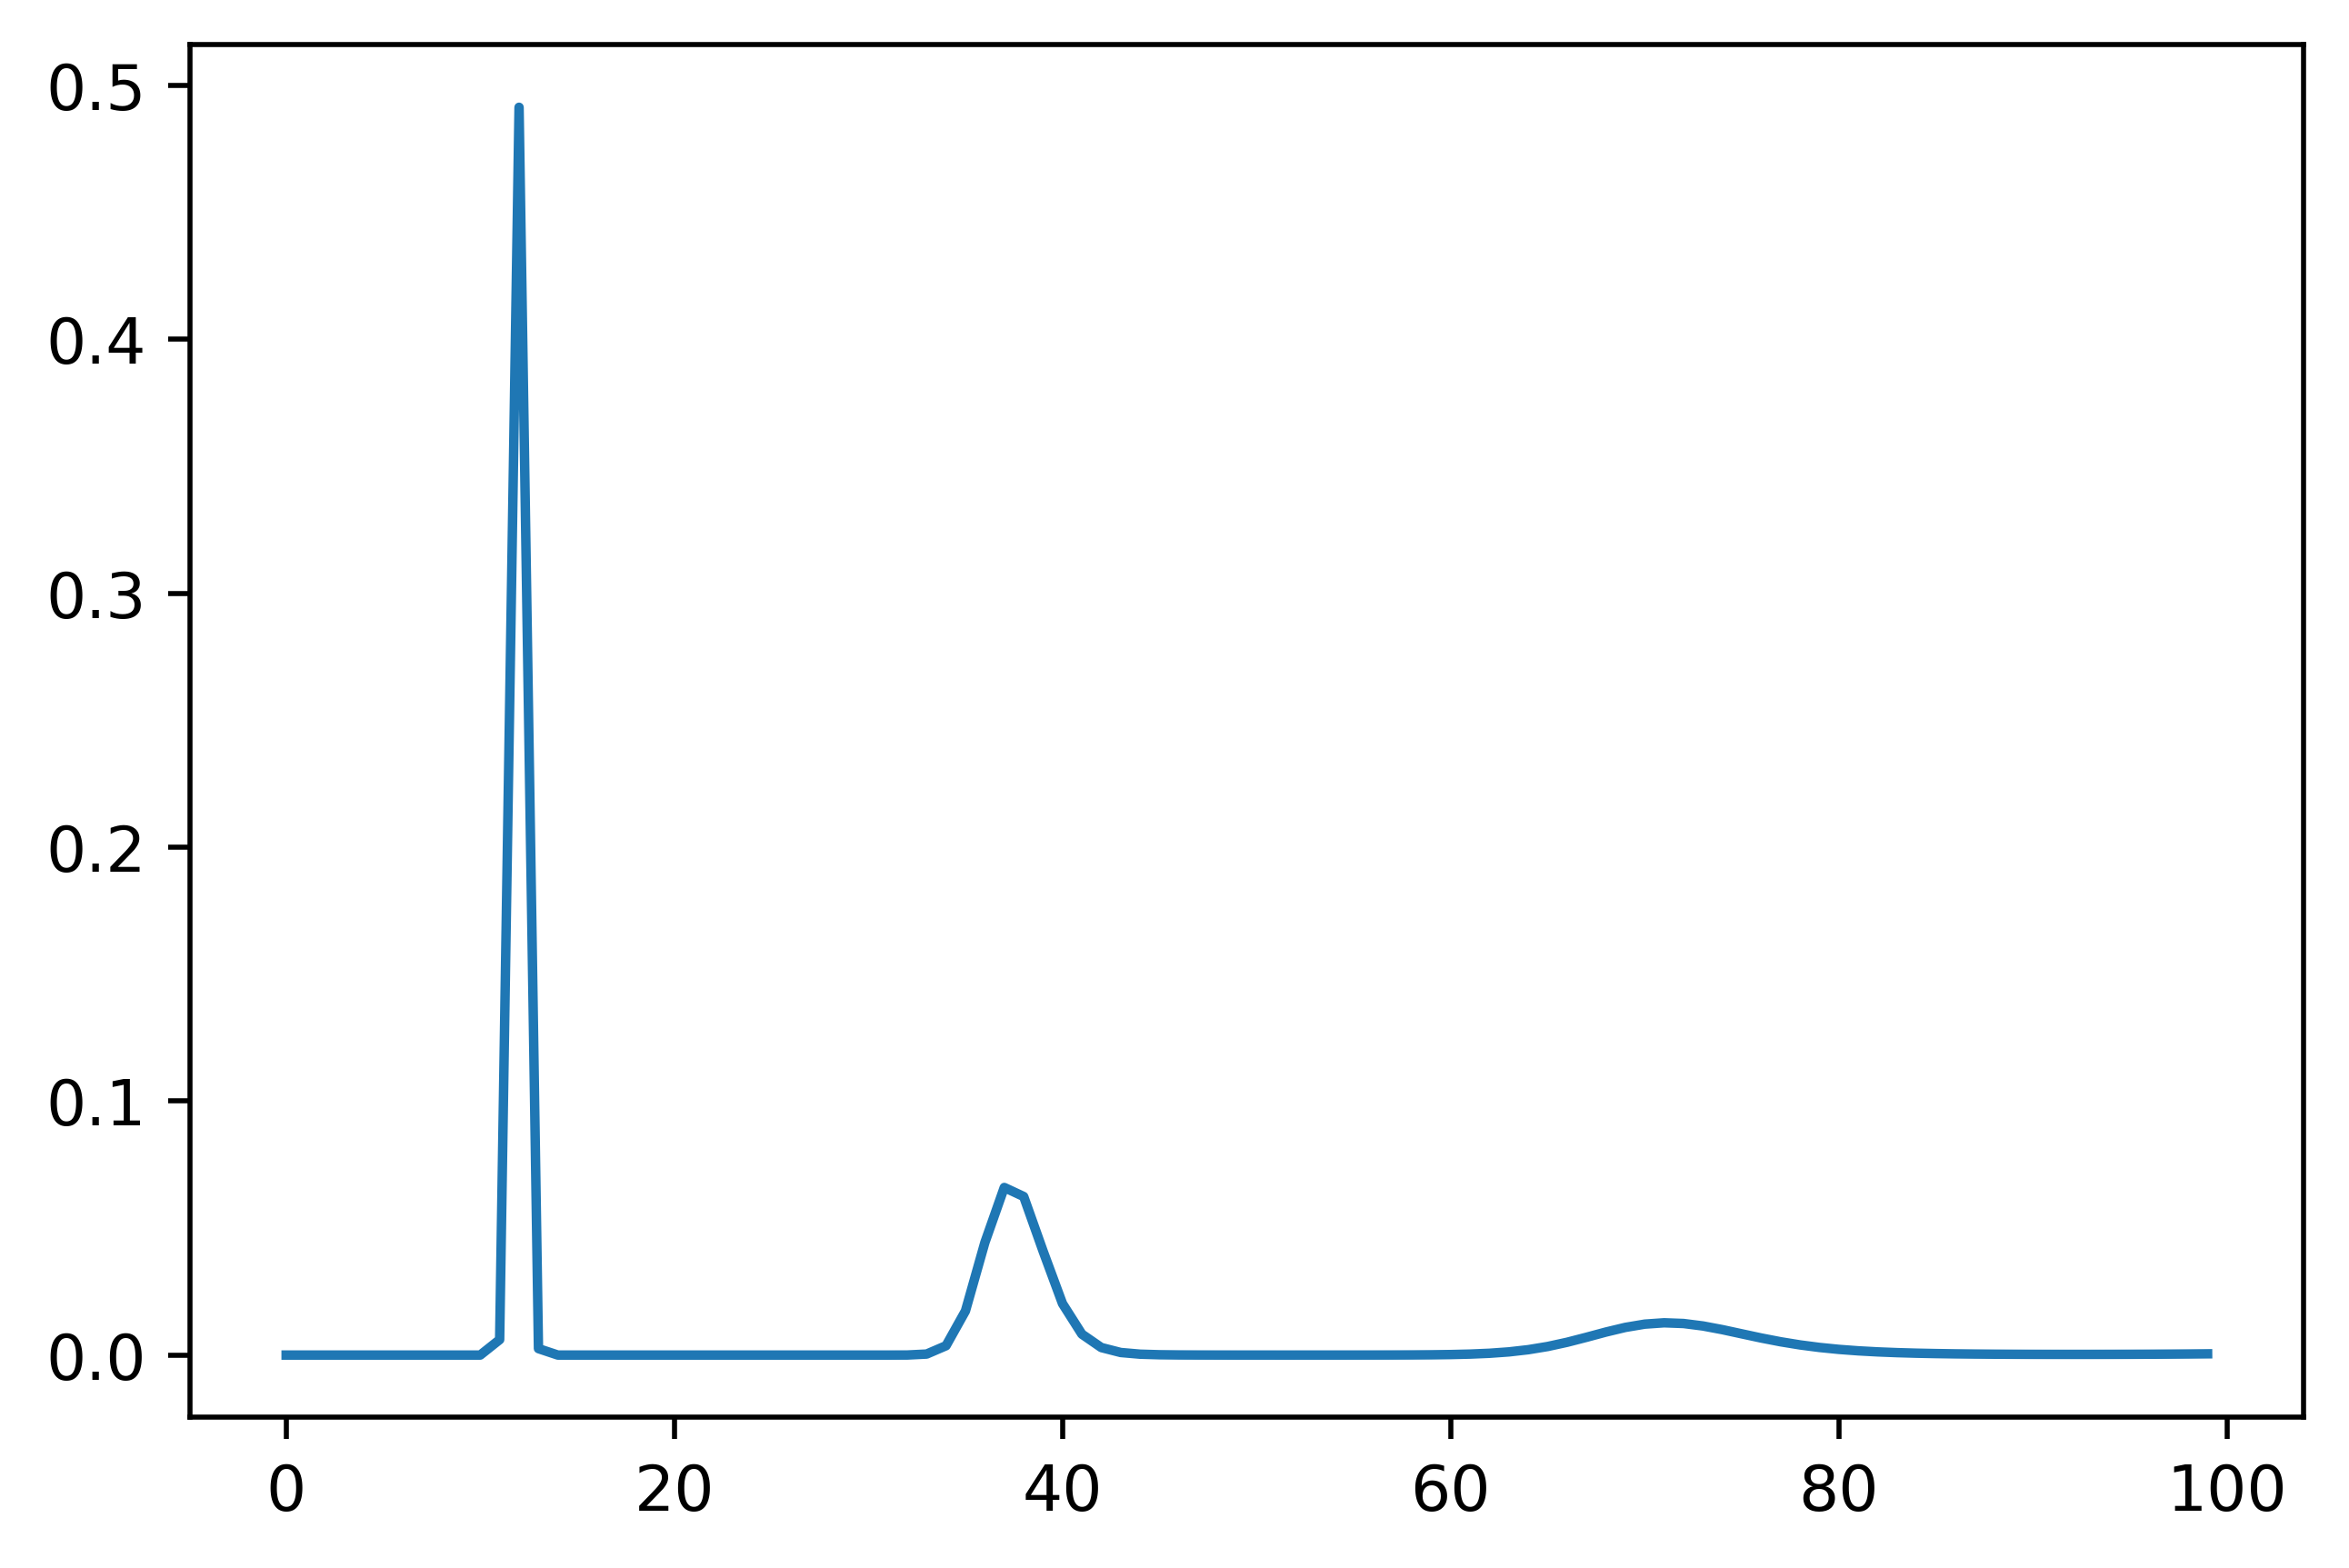

In [7]:
f = plt.figure(dpi = 500)
plt.plot(dist[:100])